In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
class BSTNode():
    # Node in a Binary Search Tree
    # Nodes need to know: 
    ### their key (int)
    ### their value (any data)
    ### left child (BSTNode)
    ### right child (BSTNode)
    ### parent (BSTNode)
    
    def __init__(self, key, value, parent):
        self.key = key
        self.value = value
        self.parent = parent
        self.height=0
        self.balance_factor=0
        self.left_child = None
        self.right_child = None

In [27]:
class BSTree():
    # Binary Search Tree Class
    # needs to know:
    #### root (BSTNode)
    #### size (int)
    # needs to do:
    #### hasKey(key) - check for a key in the tree
    #### add(key, value) - adds a (k,v) pair in a new node in the proper place in the tree.
    #### get(key) - get the value associated with a key, or throw a keyerror
    #### remove(key) - remove the node associated with a key
    #### update(key, value) - reassign the value associated with key
    #### search(key) - returns Node object associated with a key
    
    def __init__(self):
        self.root = None
        self.size = 0
        self.allKey = []
        
        
    def add(self, key, value):
        self.allKey.append(key)
        if self.root is None:
            self.root = BSTNode(key, value, None)
            self.size += 1
            return self.root
        else:
            try:
                return self.update(key, value)
            except KeyError:
                new_node = self.recursive_insert(self.root, key, value)
                self.size += 1
                return new_node
                
    def recursive_insert(self, sub_root, key, value):
        if key < sub_root.key:
            if sub_root.left_child is None:
                sub_root.left_child = BSTNode(key, value, sub_root)
                return sub_root.left_child
            else:
                return self.recursive_insert(sub_root.left_child, key, value)
        else:
            if sub_root.right_child is None:
                sub_root.right_child = BSTNode(key, value, sub_root)
                return sub_root.right_child
            else:
                return self.recursive_insert(sub_root.right_child, key, value)
            
    def update(self, key, value):
        node = self.search(key)
        node.value = value
        return node
    
    def search(self, key):
        return self.recursive_search(self.root, key)
        
    def recursive_search(self, sub_root, key):
       # print("subroot",sub_root.value)
       # print(key,sub_root.value)
        if sub_root.key == key:
            return sub_root
        else:
           # print (self.allKey, key)
            if key < sub_root.key:
                
                
                if sub_root.left_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.left_child, key)
            else:
                if sub_root.right_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.right_child, key)

    def hasKey(self, key):
        try:
            self.search(key)
            return True
        except KeyError:
            return False

    def get(self,key):
        return self.search(key).value

In [28]:
class RBNode(BSTNode):
     def __init(self,key,value,parent,):
        super(RBNode, self).__init__(key,value,parent)
        #red or black-0 for black 1 for red
        #starts red when inserted 
        self.rOb=1

In [29]:
class RBTree(BSTree):
    def __init__(self):
        super(RBTree,self).__init__()
        
    def add(self,key,value):
        #add it using super
        current=super(RBTree,self).add(key,value)
        current.rOb=1
        
        #if it is the root-change to black
        if current==self.root:
            current.rOb=0
       
        elif current.parent is not None and current.parent.rOb !=0:
            while(current is not self.root):
                #print(current.value)
                pibling=self.getpibling(current)
           
                
                if pibling is not None and pibling.rOb==1:
                        #print("red")
                        current=self.recolor(current,pibling)
                        #if there is no grandparent of current- if recolor doesn't return grandparent 
                        #we recolored up to root and our work is done
                        if current is None:
                            break
                        #if current is root loop will end-check at end of loop
                else:#pibling is black 
                    #print("black")
                        #current needs to be rotated around grandfather so
                    current=self.rotate(current)
                        ##if rotate happens-no need to loop up rest of tree so
                    break
                #if pibling IS none-dont continue looping 
               
            #case where current turns to the root inside loop
            ###need to update the root color
            if current == self.root:
                current.rOb=0 
        return current
    
    ###returns the pibling of the node if it exists and depnding on who is the pibling
    def getpibling(self,current):
        if current.parent is not None and current.parent.parent is not None:
            if current.parent.parent.left_child is not current.parent and current.parent.parent.left_child is not None:
                
              
                return current.parent.parent.left_child
            elif current.parent.parent.right_child is not current.parent and current.parent.parent.right_child is not None:
                return current.parent.parent.right_child
            else:
                return None
    ##recolor case
    def recolor(self,current,pibling):

        current.parent.rOb=0#current parent is black

        pibling.rOb=0# pibling is black
        #if gparent exists than continue with gparent
        if current.parent.parent is not None: 
            gparent=current.parent.parent
            gparent.rOb=1 #gpa is red
            #repeat for gpa so
            return gparent
        return None
    ##rotate case
    def rotate(self,current): 
        global numberRotations
        numberRotations += 1
        
        parent=current.parent
        gparent=parent.parent
        #L-L
        if gparent is not None and parent is gparent.left_child and current is parent.left_child:
            #rotated around grandparent
           # print("Ll")
            return self.left_left(current.parent.parent)
        #L-R
        if gparent is not None and parent is gparent.left_child and current is parent.right_child:
           # print("Lr")
            return self.left_right(current.parent.parent)
        #R-R
        if gparent is not None and parent is gparent.right_child and current is parent.right_child:
          #  print("Rr")
            return self.right_right(current.parent.parent)
        #R-L
        if gparent is not None and parent is gparent.right_child and current is parent.left_child:
           # print("Rl")
            return self.right_left(current.parent.parent)
        
    def left_left(self,current):
        left_child = current.left_child
        if left_child is None:
            current.left_child=current.right_child
            current.right_child=None
            left_child=current.left_child
        current.left_child = left_child.right_child
        if left_child.right_child is not None:
            left_child.right_child.parent = current
        left_child.parent = current.parent
        if current.parent is None:
            self.root = left_child
        elif current is current.parent.right_child:
            current.parent.right_child = left_child
        else:
            current.parent.left_child = left_child
        left_child.right_child = current
        current.parent = left_child
        left_child.rOb=0
        left_child.right_child.rOb=1
        return(left_child)
    def left_right(self,current):
        current.left_child = self.right_right(current.left_child);
        current.left_child.parent = current
        current = self.left_left(current);
        
    def right_right(self,current):
        right_child = current.right_child
        if right_child is None:
            current.right_child=current.left_child
            current.left_child=None
            right_child=current.right_child
        current.right_child = right_child.left_child
        if right_child.left_child is not None:
            right_child.left_child.parent = current
        right_child.parent = current.parent
        if current.parent is None:
            self.root = right_child
        elif current is current.parent.left_child:
            current.parent.left_child = right_child
        else:
            current.parent.right_child = right_child
        right_child.left_child = current
        current.parent = right_child
        right_child.rOb=0
        right_child.left_child.rOb=1
        return(right_child)
    def right_left(self,current):
        current.right_child = self.left_left(current.right_child);
        current.right_child.parent = current
        current = self.right_right(current);

In [30]:
import networkx as nx

In [31]:
def my_tree_to_nx_graph(tree):
    graph = nx.Graph()
    queue = [tree.root]
    while len(queue) > 0:
        new_node = queue.pop(0)
        if(new_node.rOb==0):
            graph.add_node(new_node.key, label=new_node.key, color=[0.0,1.0,0.0])
        else:
             graph.add_node(new_node.key, label=new_node.key, color=[1.0,0.0,0.0])
        if new_node.parent is not None:
            graph.add_edge(new_node.key, new_node.parent.key)
        if new_node.left_child is not None:
            queue.append(new_node.left_child)
        if new_node.right_child is not None:
            queue.append(new_node.right_child)
    return graph

In [32]:
my_bst_graph = my_tree_to_nx_graph(testTree)

NameError: name 'testTree' is not defined

In [33]:
labels = nx.get_node_attributes(my_bst_graph, 'label') 
colors=list(nx.get_node_attributes(my_bst_graph, 'color').values())
nx.draw(my_bst_graph, labels=labels,node_color=colors)

NameError: name 'my_bst_graph' is not defined

In [13]:
testTree.root.key

7

In [97]:
import matplotlib.pyplot as plt

In [18]:
def timeTrial(n):
    import random 
    import time
    listVal = []
    tree = RBTree()

    for nodes in range(n):
        listVal.append(nodes)

    random.shuffle(listVal)

    timeStart = time.time()

    for y in listVal:
        #print("Add",y)
        tree.add(y, y)
        
    timeEnd = time.time()
    #print("size",tree.size)
    return [ (timeEnd - timeStart), tree]
    
def searchTrial(theTree,numNodes):
    import time
    timeStart = time.time()
    
    for x in range(numNodes):
        #print (x)
        theTree.search(x)
    
    timeEnd = time.time()
    
    return timeEnd - timeStart

Text(0.5, 0, 'Number of n in the Tree')

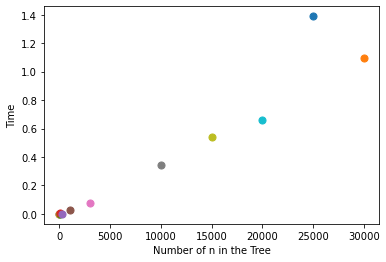

In [39]:
listOfNodes = [3,10,30,100,300,1000,3000,10000,15000,20000,25000,30000]
listOfNumberRotations = []
listOfNodesSize = []
listOfSearchTimes = []
listOfInsertTimes = []


for numNodes in listOfNodes:
    
    for numberTrials in range(50):
        numberRotations = 0
        trial = timeTrial( numNodes )
        
        timeInsert, theTree = trial
        
        listOfInsertTimes.append(time)
        
        timeSearch = searchTrial(theTree,numNodes)
        listOfSearchTimes.append(timeSearch)
        
        listOfNumberRotations.append(numberRotations)
        listOfNodesSize.append(numNodes)
        
        plt.scatter( numNodes ,timeInsert,50)
        

plt.ylabel("Time")
plt.xlabel("Number of n in the Tree")

Text(0.5, 0, 'Number of n in the Tree')

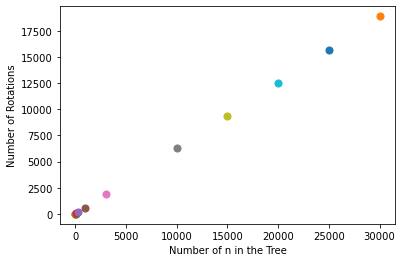

In [37]:
for x in range( len( listOfNumberRotations ) ):
    plt.scatter( listOfNodesSize[x], listOfNumberRotations[x], 50)
    
plt.ylabel("Number of Rotations")
plt.xlabel("Number of n in the Tree")

Text(0.5, 0, 'Number of n in the Tree')

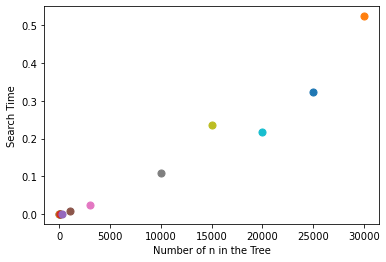

In [38]:
for x in range( len( listOfSearchTimes ) ):
    plt.scatter( listOfNodesSize[x], listOfSearchTimes[x], 50 )
    
plt.ylabel("Search Time")
plt.xlabel("Number of n in the Tree")

In [104]:
def my_rbtree_to_graphviz(tree):
    queue=[tree.root]
    print("graph {")
    while len(queue)>0:
        new_node =queue.pop(0)
        if(new_node.rOb==0):
            #graphRb.attr('node', color='black')
            #graphRb.node(str(new_node.key))
            print(new_node.key,"[color=black]")
        else: 
            #graphRb.attr('node', color='red')
            #graphRb.node(str(new_node.key))
            print(new_node.key,"[color=red]")
        
        if new_node.parent is not None:
            #graphRb.edge(str(new_node.parent.key),str(new_node.key))
            print(new_node.parent.key,"--",new_node.key)
        if new_node.left_child is not None:
            queue.append(new_node.left_child)
        if new_node.right_child is not None:
            queue.append(new_node.right_child)
    print("}")

In [110]:
import graphviz
from graphviz import Digraph

In [121]:
testTree1 = RBTree()
testTree1.add(7,7)
testTree1.add(2,2)
testTree1.add(8,8)
testTree1.add(11,11)
testTree1.add(9,9)

In [122]:
graphRb = graphviz.Graph()
my_rbtree_to_graphviz(testTree1)

graph {
7 [color=black]
2 [color=black]
7 -- 2
9 [color=black]
7 -- 9
8 [color=red]
9 -- 8
11 [color=red]
9 -- 11
}
